In [ ]:
# # 구글 드라이브 마운트
# from google.colab import drive
# drive.mount('/gdrive', force_remount=True)
# # /gdrive/My Drive/ (폴더명)

In [1]:
import os
import math
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2

In [41]:
contents = cv2.imread('contents.jpg')
contents = cv2.resize(contents, (224, 224))
# contents=cv2.cvtColor(contents,cv2.COLOR_BGR2RGB)
# contents=contents/255.

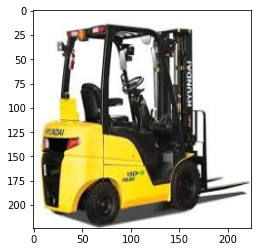

In [3]:
plt.imshow(contents)

In [42]:
style = cv2.imread('style.jpg')
style = cv2.resize(style, (224, 224))
# style=cv2.cvtColor(style,cv2.COLOR_BGR2RGB)
# style=style/255.

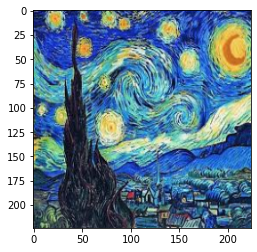

In [5]:
plt.imshow(style)

In [6]:
vgg_model=tf.keras.applications.VGG16(input_shape=(224,224,3),include_top=False,weights='imagenet')

58892288/58889256 [==============================] - 1s 0us/step


In [7]:
vgg_model.trainable=False

In [ ]:
tf.keras.utils.plot_model(vgg_model,show_shapes=True)

In [8]:
style_transfer_model=tf.keras.Model(inputs=[vgg_model.input],outputs=[
                                                            vgg_model.get_layer(name='block1_conv2').output,
                                                            vgg_model.get_layer(name='block2_conv2').output,
                                                            vgg_model.get_layer(name='block3_conv3').output,
                                                            vgg_model.get_layer(name='block4_conv3').output
])

In [ ]:
style_transfer_model.summary()

In [43]:
style_true_b1c1,style_true_b2c2,style_true_b3c3,style_true_b4c3=style_transfer_model.predict(np.reshape(style,(-1,224,224,3)))

In [ ]:
style_true_b4c3.shape

(1, 28, 28, 512)

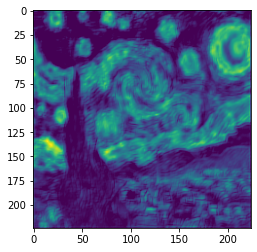

In [10]:
plt.imshow(style_true_b1c1[0][:,:,3])

In [44]:
contents_true_b1c1,contents_true_b2c2,contents_true_b3c3,contents_true_b4c3=style_transfer_model.predict(np.reshape(contents,(-1,224,224,3)))

In [ ]:
contents_true_b3c3.shape

(1, 56, 56, 256)

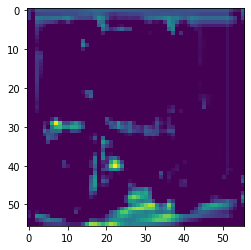

In [18]:
plt.imshow(contents_true_b3c3[0][:,:,11])

In [19]:
def gram_matrix(x):
    reshape_x=tf.transpose(x,[2,1,0])
    s = tf.shape(reshape_x)
    reshape_x=tf.reshape(reshape_x,(s[0],s[1]*s[2]))
    reshape_x_t=tf.transpose(reshape_x)
    dot=tf.matmul(reshape_x,reshape_x_t)
    dot=tf.cast(dot,dtype='float32')
    dot=dot/tf.cast(tf.shape(reshape_x)[0], tf.float32)/tf.cast(tf.shape(reshape_x)[1], tf.float32)
    return dot

In [64]:
input_image = cv2.imread('contents.jpg')
input_image = cv2.resize(input_image, (224, 224))
# input_image=cv2.cvtColor(input_image,cv2.COLOR_BGR2RGB)
# input_image=input_image/255.

In [54]:
opt=tf.keras.optimizers.Adam(10.0)


1
s_loss tf.Tensor(4228450.5, shape=(), dtype=float32)
c_loss_3 tf.Tensor(0.0, shape=(), dtype=float32)

2
s_loss tf.Tensor(2311314.0, shape=(), dtype=float32)
c_loss_3 tf.Tensor(339267.16, shape=(), dtype=float32)

3
s_loss tf.Tensor(1482186.0, shape=(), dtype=float32)
c_loss_3 tf.Tensor(480693.22, shape=(), dtype=float32)

4
s_loss tf.Tensor(793303.1, shape=(), dtype=float32)
c_loss_3 tf.Tensor(512151.34, shape=(), dtype=float32)

5
s_loss tf.Tensor(639529.9, shape=(), dtype=float32)
c_loss_3 tf.Tensor(496290.53, shape=(), dtype=float32)

6
s_loss tf.Tensor(1021584.2, shape=(), dtype=float32)
c_loss_3 tf.Tensor(740942.9, shape=(), dtype=float32)

7
s_loss tf.Tensor(731780.44, shape=(), dtype=float32)
c_loss_3 tf.Tensor(526930.3, shape=(), dtype=float32)

8
s_loss tf.Tensor(1801628.6, shape=(), dtype=float32)
c_loss_3 tf.Tensor(745149.3, shape=(), dtype=float32)

9
s_loss tf.Tensor(611142.0, shape=(), dtype=float32)
c_loss_3 tf.Tensor(547483.25, shape=(), dtype=float32)

10
s_loss tf

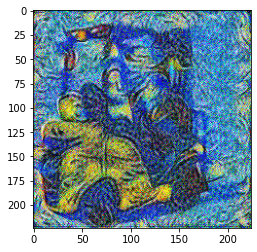

In [65]:
img_avi=np.zeros((224,224,3))
fcc=cv2.VideoWriter_fourcc(*'DIVX')
out=cv2.VideoWriter('style_transfer.avi',fcc,10.0,(224,224))
for epoch in range(50):
    input_image=tf.reshape(input_image,(-1,224,224,3))
    input_image=tf.cast(input_image,dtype='float32')
    input_image = tf.Variable(input_image, dtype=tf.float32)
    with tf.GradientTape() as tape:
        
        b1c1,b2c2,b3c3,b4c3=style_transfer_model(input_image)
        
        s_loss_1=tf.stop_gradient(gram_matrix(style_true_b1c1[0]))-gram_matrix(b1c1[0])
        s_loss_1=tf.reduce_mean(tf.square(s_loss_1))
        s_loss_2=tf.stop_gradient(gram_matrix(style_true_b2c2[0]))-gram_matrix(b2c2[0])
        s_loss_2=tf.reduce_mean(s_loss_2*s_loss_2)
        s_loss_3=tf.stop_gradient(gram_matrix(style_true_b3c3[0]))-gram_matrix(b3c3[0])
        s_loss_3=tf.reduce_mean(s_loss_3*s_loss_3)
        s_loss_4=tf.stop_gradient(gram_matrix(style_true_b4c3[0]))-gram_matrix(b4c3[0])
        s_loss_4=tf.reduce_mean(s_loss_4*s_loss_4)
              
        c_loss_1=contents_true_b1c1-b1c1
        c_loss_1=tf.reduce_mean(tf.square(c_loss_1))
        c_loss_2=contents_true_b2c2-b2c2
        c_loss_2=tf.reduce_mean(tf.square(c_loss_2))
        c_loss_3=contents_true_b3c3-b3c3
        c_loss_3=tf.reduce_mean(tf.square(c_loss_3))
        c_loss_4=contents_true_b4c3-b4c3
        c_loss_4=tf.reduce_mean(tf.square(c_loss_4))

        s_loss=(s_loss_1+s_loss_2+s_loss_3+s_loss_4)
        c_loss=(c_loss_1+c_loss_2+c_loss_3+c_loss_4)/4.
        loss=s_loss*10.0+c_loss_3
    grad=tape.gradient(loss,input_image)
    opt.apply_gradients([(grad,input_image)])
    input_image=tf.cast(input_image,dtype=tf.int32)
    input_image=tf.clip_by_value(input_image,0,255)
    img_avi=input_image.numpy()[0]
    out.write(np.uint8(img_avi))
    print()
    print(epoch+1)
    print('s_loss',s_loss)
    print('c_loss_3',c_loss_3)
plt.imshow(input_image[0][:,:,::-1])
out.release()
cv2.destroyAllWindows()